Assignment #2
Question 3 - Vortex interaction: numerical exercise 

@author: Alexandra Rochon
@collab: Olivia Locke (consulted)
14/02/24

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
import os

In [17]:
dt = 1.5
Nsteps = 20

In [3]:
## Setting up initial conditions (vortex centres and circulation)
# Vortex rings
x_v = np.array([-20,-70,-20,-70])
y_v = np.array([-40,-40,60,60])
k_v = np.array([50,50,-50,-50])

<function matplotlib.pyplot.show(*args, **kw)>

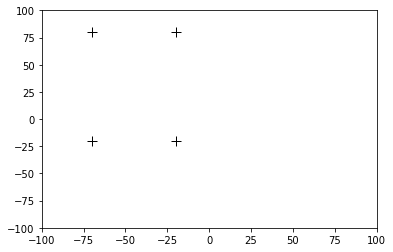

In [4]:
# Setting up the plot
plt.ion( )
fig, ax = plt.subplots(1,1)

# mark the initial positions of vortices
p, = ax.plot(x_v, y_v, 'k+', markersize=10)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
plt.show

In [5]:
# draw the initial velocity streamline
ngrid = 100
Y, X = np.mgrid[-ngrid:ngrid:360j, -ngrid:ngrid:360j] 
#360j sets the resolution of the cartesian grid; play around with it as you see fit
vel_x = np.zeros(np.shape(Y)) #this holds x-velocity
vel_y = np.zeros(np.shape(Y)) #this holds y-velocity

In [6]:
# masking radius for better visualization of the vortex centers
r_mask = 3
#insert the radius of the mask around the vortex centers
#within this mask, you will not plot any streamline 
#so that you can see more clearly the movement of the vortex centers

In [7]:
# Initial velocity field
mask_area = 2*np.pi*r_mask

# find velocity at all points X Y from each vortex (streamline) and add up
for i in range(len(x_v)): # looping over each vortex

    # insert lines for computing the total velocity field
    # u = k/r -> r to cartesian calculate X-X0 and Y-Y0
    dist = ((X - x_v[i])**2 + (Y - y_v[i])**2) # distance of each point on the grid from vortex
    
    vel_x += (Y - y_v[i])*(-k_v[i] / dist)
    vel_y += (X - x_v[i])*(k_v[i] / dist)
    
    # omega = curl u
    # insert lines for masking (set the masking area to NaN)

    # grid [x_v[i], y_v[i]] = NaN 

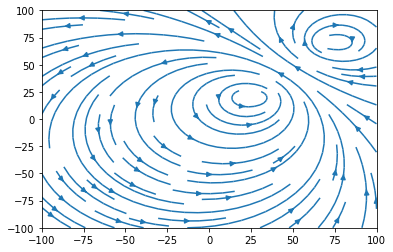

In [8]:
# plot initial streamlines

fig = plt.figure() # set up the boundaries of the simulation box
plt.xlim([-ngrid, ngrid])
plt.ylim([-ngrid, ngrid])

plt.streamplot(X, Y, vel_x, vel_y, density=[0.8, 0.8])

#play around with density as you see fit;
#see the API documentation for more detail

fig.canvas.draw()

In [9]:
# Function to create a plot
def create_plot(X,Y,x_v,y_v,vel_x,vel_y, title):
    fig = plt.figure()
    p, = plt.plot(x_v, y_v, 'ko', markersize=12)
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.xlim([-ngrid, ngrid])
    plt.ylim([-ngrid, ngrid])
    plt.streamplot(X, Y, vel_x, vel_y, density=[0.7, 0.7])
    fig.canvas.draw()

In [18]:
# Evolution
x_dif = np.zeros(4)
y_dif = np.zeros(4)

x_v = np.array([-20,-70,-20,-70])
y_v = np.array([-40,-40,60,60])
k_v = np.array([75,75,-75,-75])

x_v_new = np.zeros(np.shape(y_v))
y_v_new = np.zeros(np.shape(y_v))

vel_x = np.zeros(np.shape(Y)) #this holds x-velocity
vel_y = np.zeros(np.shape(Y)) #this holds y-velocity

Nsteps = 75 #115

# Create GIF
with imageio.get_writer('plots.gif', mode='I', duration=0.5) as writer:
    for j in range(Nsteps):
        for i in range(len(x_v)): 
        
        # compute the total advection velocity on each vortex 
        
            x_dif =  x_v - x_v[i]
            y_dif =  y_v - y_v[i]

            x_sum = np.square(x_dif)
            y_sum = np.square(y_dif)

            distance = np.add(x_sum, y_sum)

            xx = np.divide(-k_v, distance,out=np.zeros(distance.shape, dtype=float), where=distance!=0)
            yy = np.divide(k_v, distance,out=np.zeros(distance.shape, dtype=float), where=distance!=0)

            advel_x = np.sum(np.multiply(y_dif,xx,where=xx!=0))
            advel_y = np.sum(np.multiply(x_dif,yy,where=yy!=0))
        
            x_v_new[i] = x_v[i] + advel_x*dt
            y_v_new[i] = y_v[i] + advel_y*dt
        
        x_v = x_v_new
        y_v = y_v_new
    
    # reinitialize vel field
        vel_x = np.zeros(np.shape(Y)) 
        vel_y = np.zeros(np.shape(Y)) 
    
        for i in range(len(x_v)): # looping over each vortex

    # insert lines for computing the total velocity field
    # u = k/r -> r to cartesian calculate X-X0 and Y-Y0
            dist = ((X - x_v[i])**2 + (Y - y_v[i])**2) # distance of each point on the grid from vortex
    
            vel_x += (Y - y_v[i])*(-k_v[i] / dist)
            vel_y += (X - x_v[i])*(k_v[i] / dist)

        
        title = f'Plot {j+1}'
        create_plot(X,Y,x_v,y_v,vel_x,vel_y, title)
        # Capture the current plot as an image and add it to the GIF
        plt.savefig('temp_plot.png')
        writer.append_data(imageio.imread('temp_plot.png'))
            
        plt.close()

# Remove the temporary plot image
os.remove('temp_plot.png')


In [26]:
X = [1,2,3,4]
print(np.square(X))
    ## update plot
    # the following two lines clear out the previous streamlines 
#     ax.collections = [ ]
#     ax.patches = [ ]
    
#     p.setxdata(x_v)
#     p.setydata(y_v)
    
#     ax.streamplot(X, Y, vel_x, vel_y, density=[1,1])
    
#     fig.canvas.draw( )
#         print(x_sum)
    # update the positions of vortices 
    
    # check how each vortex is affected by other vortices == advection velocity
    # copy paste streamline code again
#         y_v = np.array([20,20,70,70])
#         x_v = np.array([20,30,70,80])

[ 1  4  9 16]


In [11]:

# #play around with density as you see fit;
# #see the API documentation for more detail
# # Evolution
# count = 0
# x_dif = np.zeros(4)
# y_dif = np.zeros(4)

# # x_v = np.array([2,4,6,8])
# # y_v = np.array([1,1,2,2])

# x_v_new = np.zeros(np.shape(y_v))
# y_v_new = np.zeros(np.shape(y_v))

# vel_x = np.zeros(np.shape(Y)) #this holds x-velocity
# vel_y = np.zeros(np.shape(Y)) #this holds y-velocity

# Nsteps = 10
# while count < Nsteps:
#     ## Compute and update advection velocity
#     # insert lines to re-initialize the total velocity field
#     for i in range(len(x_v)): 
#         # insert lines to compute the total 
#         # advection velocity on each vortex 
        
#         x_dif =  x_v - x_v[i]
#         y_dif =  y_v - y_v[i]

# #         print(x_sum)
#         x_sum = np.square(x_dif)
#         y_sum = np.square(y_dif)
#        # print(x_sum, y_sum)
#         distance = np.add(x_sum, y_sum)
#         #print(distance)
        
# #        dist[dist != 0]
#         xx = np.divide(-k_v, distance,out=np.zeros(distance.shape, dtype=float), where=distance!=0)
#         yy = np.divide(k_v, distance,out=np.zeros(distance.shape, dtype=float), where=distance!=0)
#         #print('this is ',xx)
#         advel_x = np.sum(np.multiply(x_dif,xx,where=xx!=0))
#         advel_y = np.sum(np.multiply(y_dif,yy,where=yy!=0))
        
#         x_v_new[i] = x_v[i] + advel_x*dt
#         y_v_new[i] = y_v[i] + advel_y*dt
        
#     x_v = x_v_new
#     y_v = y_v_new
    
#     # reinitialize vel field
#     vel_x = np.zeros(np.shape(Y)) 
#     vel_y = np.zeros(np.shape(Y)) 
    
#     for i in range(len(x_v)): # looping over each vortex

#     # insert lines for computing the total velocity field
#     # u = k/r -> r to cartesian calculate X-X0 and Y-Y0
#         dist = ((X - x_v[i])**2 + (Y - y_v[i])**2) # distance of each point on the grid from vortex
    
#         vel_x += (Y - y_v[i])*(-k_v[i] / dist)
#         vel_y += (X - x_v[i])*(k_v[i] / dist)


#     ax.clear()
#     fig = plt.figure() # set up the boundaries of the simulation box
#     p, = plt.plot(x_v, y_v, 'ro', markersize=8) # plot vortex positions
#     plt.xlim([-ngrid, ngrid])
#     plt.ylim([-ngrid, ngrid])

#     plt.streamplot(X, Y, vel_x, vel_y, density=[0.8, 0.8])

#     fig.canvas.draw()

    
#     plt.pause(0.001) # play around with the delay time for better visualization
#     count += 1

array([0., 0., 0., 0.])